[Reference](https://python.plainenglish.io/extract-weather-and-climate-data-using-python-and-meteostat-0642f9df5163)

In [3]:
pip install meteostat

In [4]:
from datetime import datetime
from meteostat import Point
from meteostat import Hourly
from meteostat import Daily
from meteostat import Monthly
import pandas as pd

from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error

In [5]:
# Set time period
start = datetime(2021, 1, 1)
end = datetime(2022, 9, 30)

In [6]:
# Create Point for Bangalore, KARNATAKA
place = Point(12.971599, 77.594566)

In [7]:
# Get hourly data
data = Hourly(place, start, end)
data = data.fetch()

In [8]:
# Get daily data
data = Daily(place, start, end)
data = data.fetch()

In [9]:
# Show dataframe
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-01-01,20.6,16.6,25.3,0.5,NaN,93.0,10.4,NaN,1015.7,NaN
2021-01-02,20.9,16.6,26.0,0.4,NaN,74.0,11.3,NaN,1014.5,NaN
2021-01-03,21.9,18.8,26.0,0.0,NaN,86.0,12.0,NaN,1013.0,NaN
2021-01-04,20.8,18.6,27.6,0.0,NaN,84.0,10.8,NaN,1013.1,NaN
2021-01-05,21.9,18.7,26.2,0.0,NaN,83.0,10.9,NaN,1013.9,NaN


In [10]:
# Get Monthly data
data = Monthly(place, start, end)
data = data.fetch()

In [11]:
# Show dataframe
data.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2021-01-01,22.6,17.7,27.6,21.0,7.3,1014.7,8640.0
2021-02-01,23.6,16.9,30.3,10.0,9.2,1014.2,12240.0
2021-03-01,26.8,19.5,34.0,0.0,9.3,1012.4,14100.0
2021-04-01,28.2,22.1,34.2,118.0,7.2,1011.3,9780.0
2021-05-01,26.9,22.1,31.8,131.0,9.8,1009.4,11220.0


In [12]:
import math
import warnings
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

from meteostat import Point
from meteostat import Hourly
from meteostat import Daily
from meteostat import Monthly

In [13]:
# Set time period
start = datetime(2021, 1, 1)
end = datetime(2022, 9, 30)

# Create Point for Bangalore, KARNATAKA
place = Point(12.971599, 77.594566)
data = Daily(place, start, end)
data = data.fetch()

In [14]:
train = data.loc[:'2022-08-31']
test = data.loc['2022-09-01':]

train.shape, test.shape

((608, 10), (30, 10))

In [15]:
train = data[['tavg']]
train = train.reset_index()
train.columns = ['ds', 'y']

In [16]:
model = Prophet()
model.fit(train)
future = pd.DataFrame(test.index.values)
future.columns = ['ds']
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp23jlln4f/xac6c7qh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp23jlln4f/scpa196z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71815', 'data', 'file=/tmp/tmp23jlln4f/xac6c7qh.json', 'init=/tmp/tmp23jlln4f/scpa196z.json', 'output', 'file=/tmp/tmp23jlln4f/prophet_modeltmlz6jr4/prophet_model-20240225052951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:29:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:29:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
# calculate MAE between expected and predicted values
y_true = test['tavg'].values
y_pred = forecast['yhat'].values
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

RMSE: 0.9557725469615018


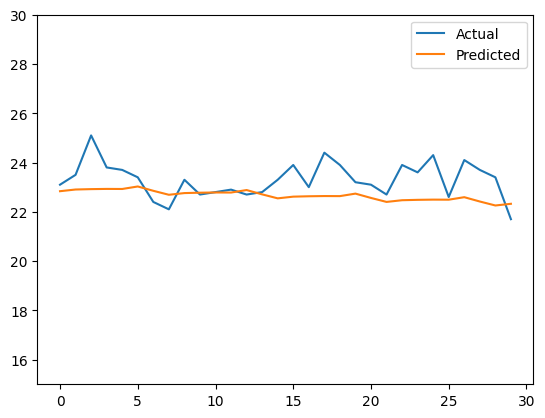

In [18]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylim(ymax=30, ymin=15)
plt.legend()
plt.show()